In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

Importing Datasets

In [2]:
df1 = pd.read_csv('C:\\Users\\zeyne\\Downloads\\train.csv.zip')
df2 = pd.read_csv('C:\\Users\\zeyne\Downloads\\youtoxic_english_1000.csv')

In [3]:
df1['Toxic'] = df1.iloc[: , 2:].any(axis=1)
df1_processed=df1[['comment_text' , 'Toxic']].rename(columns={'comment_text' : 'Text'})

df2['Toxic']=df2.iloc[:,3:].any(axis=1)
df2_processed=df2[['Text','Toxic']]

df=pd.concat([df1_processed , df2_processed],ignore_index=True)

df

,Text,Toxic
0,Explanation\nWhy the edits made under my usern...,False
1,D'aww! He matches this background colour I'm s...,False
2,"Hey man, I'm really not trying to edit war. It...",False
3,"""\nMore\nI can't make any real suggestions on ...",False
4,"You, sir, are my hero. Any chance you remember...",False
...,...,...
160566,I remember that they sent in the national defe...,False
160567,Stats don`t represent the problem. Race baitin...,True
160568,The quote from the mother... Wow that hit hard...,False
160569,this video is so racist,False


EDA

In [4]:
duplicate_rows = df[df.duplicated(subset=['Text'] , keep=False)]
print("Duplicate rows based on 'Text' column:")
print(duplicate_rows)

df.drop_duplicates(subset=['Text'], keep='first',inplace=True)

print("Number of rows after removing duplicates:" , len(df))

df.reset_index(drop=True , inplace=True)

Duplicate rows based on 'Text' column:
                 Text  Toxic
160163  RUN THEM OVER   True
160213  run them over   True
160228  run them over   True
160248  run them over   True
160270  RUN THEM OVER   True
Number of rows after removing duplicates: 160568


In [5]:
toxic_distribution = df['Toxic'].value_counts()
print(toxic_distribution)

Toxic
False    143884
True      16684
Name: count, dtype: int64


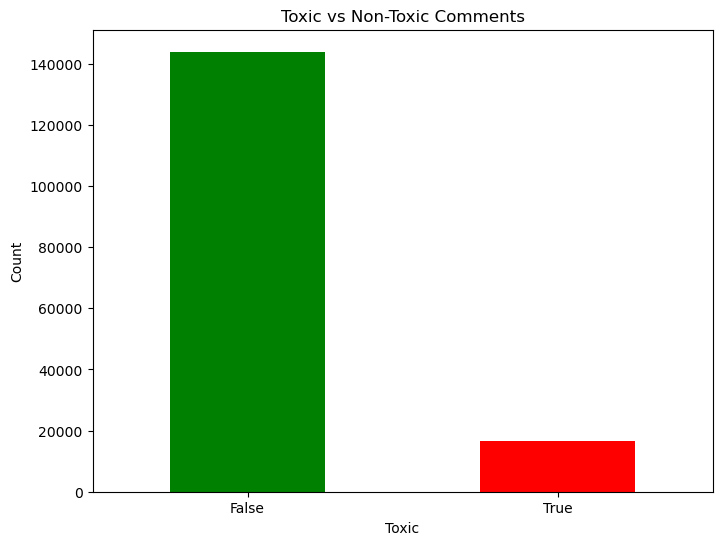

In [6]:
plt.figure(figsize=(8,6))

toxic_counts=df['Toxic'].value_counts()
toxic_counts.plot(kind='bar' , color=['green' , 'red'])   #Pandas'ın Matplotlib ile entegre edilmiş bir fonksiyonudur.

plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

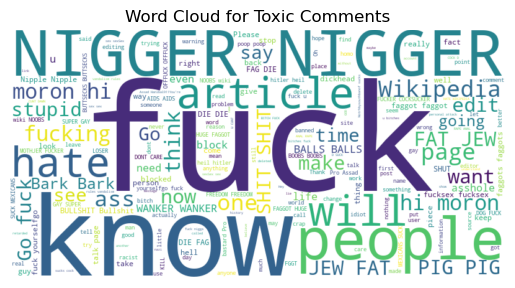

In [7]:
toxic_comments=' '.join(df[df['Toxic']]['Text'])

wordcloud_toxic = WordCloud(width=800, height=400, background_color='white').generate(toxic_comments)

plt.imshow(wordcloud_toxic , interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Toxic Comments')
plt.show()

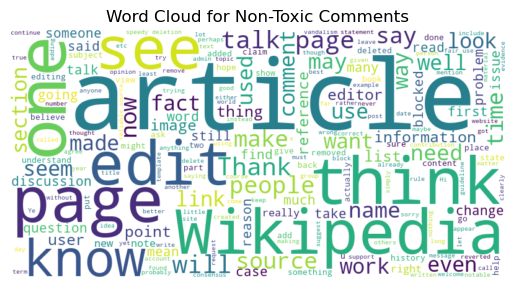

In [8]:
non_toxic_comments= " ".join(df[~df['Toxic']]['Text'])

wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white').generate(non_toxic_comments)

plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Toxic Comments')
plt.show()

Transformation of Data

In [9]:
df['Toxic'] = df['Toxic'].astype(int)

In [10]:
def clean_text(text):
  text = text.lower()
  text=re.sub(r"what's","what is",text)
  text=re.sub(r"\'s"," ",text)
  text=re.sub(r"\'ve", "have", text)
  text=re.sub(r"can't", "cannot", text)
  text=re.sub(r"n't", "not", text)
  text=re.sub(r"i'm", "i am", text)
  text=re.sub(r"\'re", "are", text)
  text=re.sub(r"\'d", "would", text)
  text=re.sub(r"\'ll", "will", text)
  text=re.sub(r"\'scuse", "excuse", text)
  text=re.sub(r'\W', ' ', text)
  text=re.sub(r'\s+', ' ',text)
  text=text.strip(' ')
  return text

In [11]:
df['Text'] = df['Text'].map(lambda com : clean_text(com))

Vectorizer

TF-IDF nin çıktısı bir sparse yani seyrek matrix , 0 lardan arıntırılmış olarak düşün, 0 olmayan değerler ve onların koordinatlarını tutuyot sadece, toarray() ile ndarray formatına dönüştürebilirsin ann eğitebilmek için.

TF-IDF kısaca: her bir feature ın kelimelerinin (fetaure döküman diye de geçiyor) o dökümana göre TF-IDF değeri hesaplanır (TF dökümandan dökümana değişebilir ama IDF veri seti geneline göre hesaplandığı için aynı kelime için hep sabittir). VE en yüksek TF-IDF değerine sahip 5000 kelime yani feature alınır bu kodda.

In [12]:
#Vectorize the text data using TF-IDF

vect=TfidfVectorizer(max_features=5000, stop_words='english')
X=vect.fit_transform(df['Text'])
Y=df['Toxic']

Spliting Data

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [14]:
print(x_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2599711 stored elements and shape (128454, 5000)>
  Coords	Values
  (0, 1574)	0.13636644881362772
  (0, 2429)	0.33373758354465427
  (0, 3716)	0.207265837173616
  (0, 3049)	0.16663264110309445
  (0, 566)	0.1553643953290185
  (0, 4893)	0.4772200354043109
  (0, 4336)	0.2034100409259511
  (0, 349)	0.17597861302911869
  (0, 4764)	0.2830154614584706
  (0, 1687)	0.20884647816409643
  (0, 3589)	0.23783555204230936
  (0, 1199)	0.2823650510285795
  (0, 4419)	0.323957557620042
  (0, 2576)	0.3318400280921325
  (1, 1807)	0.14302030845801011
  (1, 4430)	0.03477953865704296
  (1, 3245)	0.13752078958847996
  (1, 4494)	0.0448783100262532
  (1, 1633)	0.04356016012456533
  (1, 4893)	0.06957021022597157
  (1, 4715)	0.3235842497622105
  (1, 1850)	0.3942519708906006
  (1, 3662)	0.3306670958848027
  (1, 2577)	0.1417018245782766
  (1, 4706)	0.07969757501272504
  :	:
  (128451, 4928)	0.1475263842599297
  (128451, 909)	0.15331962247125114
  (128451, 

In [15]:
print(y_train)

93996     0
125290    0
57376     0
38369     0
67629     0
         ..
119879    0
103694    0
131932    1
146867    0
121958    0
Name: Toxic, Length: 128454, dtype: int32


SMOTE

In [16]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()

X_resampled, y_resampled =smote.fit_resample(x_train, y_train)

In [17]:
print(X_resampled)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4042812 stored elements and shape (230288, 5000)>
  Coords	Values
  (0, 1574)	0.13636644881362772
  (0, 2429)	0.33373758354465427
  (0, 3716)	0.207265837173616
  (0, 3049)	0.16663264110309445
  (0, 566)	0.1553643953290185
  (0, 4893)	0.4772200354043109
  (0, 4336)	0.2034100409259511
  (0, 349)	0.17597861302911869
  (0, 4764)	0.2830154614584706
  (0, 1687)	0.20884647816409643
  (0, 3589)	0.23783555204230936
  (0, 1199)	0.2823650510285795
  (0, 4419)	0.323957557620042
  (0, 2576)	0.3318400280921325
  (1, 1807)	0.14302030845801011
  (1, 4430)	0.03477953865704296
  (1, 3245)	0.13752078958847996
  (1, 4494)	0.0448783100262532
  (1, 1633)	0.04356016012456533
  (1, 4893)	0.06957021022597157
  (1, 4715)	0.3235842497622105
  (1, 1850)	0.3942519708906006
  (1, 3662)	0.3306670958848027
  (1, 2577)	0.1417018245782766
  (1, 4706)	0.07969757501272504
  :	:
  (230286, 488)	0.05114121652893167
  (230286, 2750)	0.043929292348243325
  (230286

In [18]:
model= Sequential([
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
X_resampled = X_resampled.toarray()
y_resampled = np.array(y_resampled)

In [20]:
history=model.fit(X_resampled, y_resampled, epochs=5, batch_size=32, validation_split=0.2 )

Epoch 1/5
5758/5758 [==============================] - 170s 29ms/step - loss: 0.2318 - accuracy: 0.9091 - val_loss: 0.2054 - val_accuracy: 0.9343
Epoch 2/5
5758/5758 [==============================] - 168s 29ms/step - loss: 0.1619 - accuracy: 0.9396 - val_loss: 0.1665 - val_accuracy: 0.9481
Epoch 3/5
5758/5758 [==============================] - 194s 34ms/step - loss: 0.1322 - accuracy: 0.9525 - val_loss: 0.1204 - val_accuracy: 0.9683
Epoch 4/5
5758/5758 [==============================] - 163s 28ms/step - loss: 0.1102 - accuracy: 0.9624 - val_loss: 0.1012 - val_accuracy: 0.9767
Epoch 5/5
5758/5758 [==============================] - 161s 28ms/step - loss: 0.0940 - accuracy: 0.9690 - val_loss: 0.0879 - val_accuracy: 0.9833


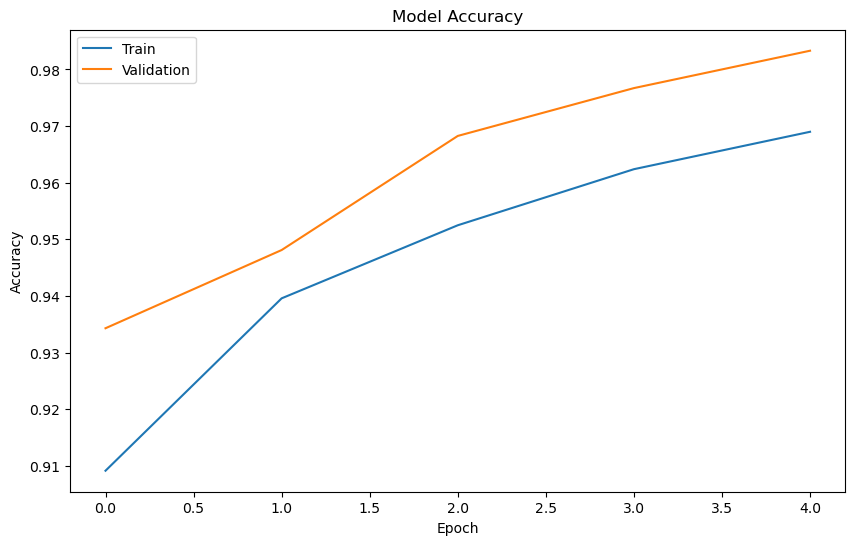

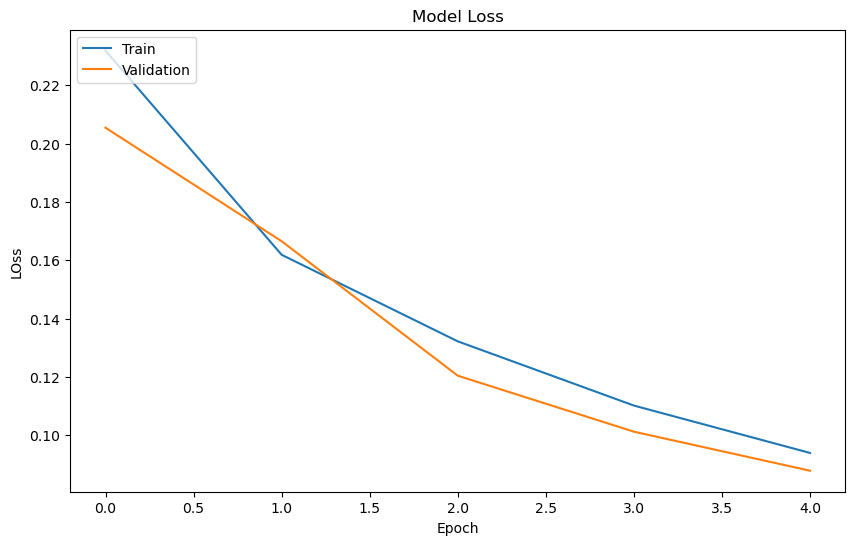

In [26]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Train','Validation'] , loc='upper left')
plt.show()



plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('LOss')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

Evaluation of model

In [29]:
x_test=x_test.toarray()

In [30]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy:{accuracy}')

1004/1004 [==============================] - 27s 27ms/step - loss: 0.2027 - accuracy: 0.9430
Test Accuracy:0.9430466294288635


In [35]:
y_pred_proba=model.predict(x_test)
y_pred = (y_pred_proba > 0.5).astype(int)

report = classification_report(y_test, y_pred)
print(report)

1004/1004 [==============================] - 29s 29ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     28740
           1       0.71      0.76      0.74      3374

    accuracy                           0.94     32114
   macro avg       0.84      0.86      0.85     32114
weighted avg       0.94      0.94      0.94     32114



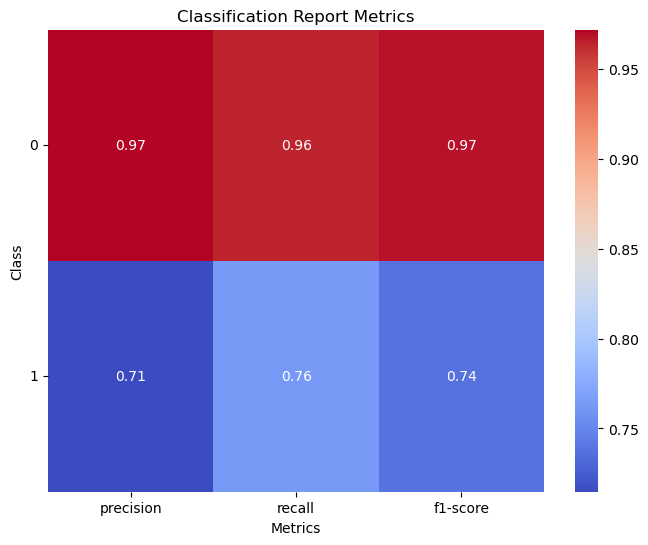

In [38]:
report = classification_report(y_test , y_pred , output_dict=True)
df_report=pd.DataFrame(report).transpose()

class_metrics=df_report.drop(['accuracy','macro avg','weighted avg'])
plt.figure(figsize=(8,6))

sns.heatmap(class_metrics[['precision','recall','f1-score']],annot=True , cmap='coolwarm', fmt=".2f")

plt.title('Classification Report Metrics')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.yticks(rotation=0)
plt.show()

Save Vectorizer and Model

In [40]:
import pickle

with open('tfidf_vectorizer.pkl','wb')as f:
    pickle.dump(vect,f)


In [41]:
model.save('toxic_comment.h5')